#  cargando librerias

In [1]:
library(MASS)
library(leaps)
library(alr4)

Loading required package: car

Loading required package: carData

Loading required package: effects

lattice theme set by effectsTheme()
See ?effectsTheme for details.



# cargando datos

In [4]:
cemento <- read.table("C:/Users/marti/OneDrive/Escritorio/jupyter/database/cemento.txt",header=T)

head(cemento)


,Y,x1,x2,x3,x4
,<dbl>,<int>,<int>,<int>,<int>
1,78.5,7,26,6,60
2,74.3,1,29,15,52
3,104.3,11,56,8,20
4,87.6,11,31,8,47
5,95.9,7,52,6,33
6,109.2,11,55,9,22


# Forward selection

In [3]:
 regre1 <- lm(Y ~ 1, data=cemento)
 summary(regre1)


Call:
lm(formula = Y ~ 1, data = cemento)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.9231 -11.6231   0.4769  13.7769  20.4769 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   95.423      4.172   22.87  2.9e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.04 on 12 degrees of freedom


# Usando paquete MASS

In [4]:
stepAIC(regre1,  direction="forward", data=cemento, 
         scope=list(lower=~1,upper=~x1+x2+x3+x4),trace=1)

Start:  AIC=71.44
Y ~ 1

       Df Sum of Sq     RSS    AIC
+ x4    1   1831.90  883.87 58.852
+ x2    1   1809.43  906.34 59.178
+ x1    1   1450.08 1265.69 63.519
+ x3    1    776.36 1939.40 69.067
<none>              2715.76 71.444

Step:  AIC=58.85
Y ~ x4

       Df Sum of Sq    RSS    AIC
+ x1    1    809.10  74.76 28.742
+ x3    1    708.13 175.74 39.853
<none>              883.87 58.852
+ x2    1     14.99 868.88 60.629

Step:  AIC=28.74
Y ~ x4 + x1

       Df Sum of Sq    RSS    AIC
+ x2    1    26.789 47.973 24.974
+ x3    1    23.926 50.836 25.728
<none>              74.762 28.742

Step:  AIC=24.97
Y ~ x4 + x1 + x2

       Df Sum of Sq    RSS    AIC
<none>              47.973 24.974
+ x3    1   0.10909 47.864 26.944



Call:
lm(formula = Y ~ x4 + x1 + x2, data = cemento)

Coefficients:
(Intercept)           x4           x1           x2  
    71.6483      -0.2365       1.4519       0.4161  


# Usando paquete alr4

In [5]:
 f <- with(cemento, ~x1+x2+x3+x4)
 
 m.forward <- step(regre1, scope=f, direction="forward")

Start:  AIC=71.44
Y ~ 1

       Df Sum of Sq     RSS    AIC
+ x4    1   1831.90  883.87 58.852
+ x2    1   1809.43  906.34 59.178
+ x1    1   1450.08 1265.69 63.519
+ x3    1    776.36 1939.40 69.067
<none>              2715.76 71.444

Step:  AIC=58.85
Y ~ x4

       Df Sum of Sq    RSS    AIC
+ x1    1    809.10  74.76 28.742
+ x3    1    708.13 175.74 39.853
<none>              883.87 58.852
+ x2    1     14.99 868.88 60.629

Step:  AIC=28.74
Y ~ x4 + x1

       Df Sum of Sq    RSS    AIC
+ x2    1    26.789 47.973 24.974
+ x3    1    23.926 50.836 25.728
<none>              74.762 28.742

Step:  AIC=24.97
Y ~ x4 + x1 + x2

       Df Sum of Sq    RSS    AIC
<none>              47.973 24.974
+ x3    1   0.10909 47.864 26.944


# Backward elimination 

In [6]:
regre2 <- lm(Y ~ x1+x2+x3+x4, data=cemento)
summary(regre2) 


Call:
lm(formula = Y ~ x1 + x2 + x3 + x4, data = cemento)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
x1            1.5511     0.7448   2.083   0.0708 .
x2            0.5102     0.7238   0.705   0.5009  
x3            0.1019     0.7547   0.135   0.8959  
x4           -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


# Usando paquete MASS

In [7]:
stepAIC(regre2,  direction="backward", data=cemento, trace=1)

Start:  AIC=26.94
Y ~ x1 + x2 + x3 + x4

       Df Sum of Sq    RSS    AIC
- x3    1    0.1091 47.973 24.974
- x4    1    0.2470 48.111 25.011
- x2    1    2.9725 50.836 25.728
<none>              47.864 26.944
- x1    1   25.9509 73.815 30.576

Step:  AIC=24.97
Y ~ x1 + x2 + x4

       Df Sum of Sq    RSS    AIC
<none>               47.97 24.974
- x4    1      9.93  57.90 25.420
- x2    1     26.79  74.76 28.742
- x1    1    820.91 868.88 60.629



Call:
lm(formula = Y ~ x1 + x2 + x4, data = cemento)

Coefficients:
(Intercept)           x1           x2           x4  
    71.6483       1.4519       0.4161      -0.2365  


# Usando paquete alr4

In [8]:
m.backward <- step(regre2, scope = c(lower = ~ 1), direction="backward")

Start:  AIC=26.94
Y ~ x1 + x2 + x3 + x4

       Df Sum of Sq    RSS    AIC
- x3    1    0.1091 47.973 24.974
- x4    1    0.2470 48.111 25.011
- x2    1    2.9725 50.836 25.728
<none>              47.864 26.944
- x1    1   25.9509 73.815 30.576

Step:  AIC=24.97
Y ~ x1 + x2 + x4

       Df Sum of Sq    RSS    AIC
<none>               47.97 24.974
- x4    1      9.93  57.90 25.420
- x2    1     26.79  74.76 28.742
- x1    1    820.91 868.88 60.629


# Stepwise

# Usando paquete MASS

In [9]:
stepAIC(regre1,  direction="both", data=cemento, 
        scope=list(lower=~1,upper=~x1+x2+x3+x4), trace=1)

stepAIC(regre2,  direction="both", data=cemento, trace=1)

summary(lm(Y~x1+x2+x4,data=cemento))


Start:  AIC=71.44
Y ~ 1

       Df Sum of Sq     RSS    AIC
+ x4    1   1831.90  883.87 58.852
+ x2    1   1809.43  906.34 59.178
+ x1    1   1450.08 1265.69 63.519
+ x3    1    776.36 1939.40 69.067
<none>              2715.76 71.444

Step:  AIC=58.85
Y ~ x4

       Df Sum of Sq     RSS    AIC
+ x1    1    809.10   74.76 28.742
+ x3    1    708.13  175.74 39.853
<none>               883.87 58.852
+ x2    1     14.99  868.88 60.629
- x4    1   1831.90 2715.76 71.444

Step:  AIC=28.74
Y ~ x4 + x1

       Df Sum of Sq     RSS    AIC
+ x2    1     26.79   47.97 24.974
+ x3    1     23.93   50.84 25.728
<none>                74.76 28.742
- x1    1    809.10  883.87 58.852
- x4    1   1190.92 1265.69 63.519

Step:  AIC=24.97
Y ~ x4 + x1 + x2

       Df Sum of Sq    RSS    AIC
<none>               47.97 24.974
- x4    1      9.93  57.90 25.420
+ x3    1      0.11  47.86 26.944
- x2    1     26.79  74.76 28.742
- x1    1    820.91 868.88 60.629



Call:
lm(formula = Y ~ x4 + x1 + x2, data = cemento)

Coefficients:
(Intercept)           x4           x1           x2  
    71.6483      -0.2365       1.4519       0.4161  


Start:  AIC=26.94
Y ~ x1 + x2 + x3 + x4

       Df Sum of Sq    RSS    AIC
- x3    1    0.1091 47.973 24.974
- x4    1    0.2470 48.111 25.011
- x2    1    2.9725 50.836 25.728
<none>              47.864 26.944
- x1    1   25.9509 73.815 30.576

Step:  AIC=24.97
Y ~ x1 + x2 + x4

       Df Sum of Sq    RSS    AIC
<none>               47.97 24.974
- x4    1      9.93  57.90 25.420
+ x3    1      0.11  47.86 26.944
- x2    1     26.79  74.76 28.742
- x1    1    820.91 868.88 60.629



Call:
lm(formula = Y ~ x1 + x2 + x4, data = cemento)

Coefficients:
(Intercept)           x1           x2           x4  
    71.6483       1.4519       0.4161      -0.2365  



Call:
lm(formula = Y ~ x1 + x2 + x4, data = cemento)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0919 -1.8016  0.2562  1.2818  3.8982 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  71.6483    14.1424   5.066 0.000675 ***
x1            1.4519     0.1170  12.410 5.78e-07 ***
x2            0.4161     0.1856   2.242 0.051687 .  
x4           -0.2365     0.1733  -1.365 0.205395    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.309 on 9 degrees of freedom
Multiple R-squared:  0.9823,	Adjusted R-squared:  0.9764 
F-statistic: 166.8 on 3 and 9 DF,  p-value: 3.323e-08


# Usando paquete alr4

In [10]:
m.stepup <- step(regre1, scope=f)

m.stepdown <- step(regre2, scope = c(lower = ~ 1) )

Start:  AIC=71.44
Y ~ 1

       Df Sum of Sq     RSS    AIC
+ x4    1   1831.90  883.87 58.852
+ x2    1   1809.43  906.34 59.178
+ x1    1   1450.08 1265.69 63.519
+ x3    1    776.36 1939.40 69.067
<none>              2715.76 71.444

Step:  AIC=58.85
Y ~ x4

       Df Sum of Sq     RSS    AIC
+ x1    1    809.10   74.76 28.742
+ x3    1    708.13  175.74 39.853
<none>               883.87 58.852
+ x2    1     14.99  868.88 60.629
- x4    1   1831.90 2715.76 71.444

Step:  AIC=28.74
Y ~ x4 + x1

       Df Sum of Sq     RSS    AIC
+ x2    1     26.79   47.97 24.974
+ x3    1     23.93   50.84 25.728
<none>                74.76 28.742
- x1    1    809.10  883.87 58.852
- x4    1   1190.92 1265.69 63.519

Step:  AIC=24.97
Y ~ x4 + x1 + x2

       Df Sum of Sq    RSS    AIC
<none>               47.97 24.974
- x4    1      9.93  57.90 25.420
+ x3    1      0.11  47.86 26.944
- x2    1     26.79  74.76 28.742
- x1    1    820.91 868.88 60.629
Start:  AIC=26.94
Y ~ x1 + x2 + x3 + x4

       

# Todos los submodelos

# Usando paquete leaps

In [12]:
 all.submodels <- regsubsets(Y ~ x1+x2+x3+x4, data=cemento,  nbest=3)

# plot a table of models showing variables in each model. 

In [13]:
 summary(all.submodels)

Subset selection object
Call: regsubsets.formula(Y ~ x1 + x2 + x3 + x4, data = cemento, nbest = 3)
4 Variables  (and intercept)
   Forced in Forced out
x1     FALSE      FALSE
x2     FALSE      FALSE
x3     FALSE      FALSE
x4     FALSE      FALSE
3 subsets of each size up to 4
Selection Algorithm: exhaustive
         x1  x2  x3  x4 
1  ( 1 ) " " " " " " "*"
1  ( 2 ) " " "*" " " " "
1  ( 3 ) "*" " " " " " "
2  ( 1 ) "*" "*" " " " "
2  ( 2 ) "*" " " " " "*"
2  ( 3 ) " " " " "*" "*"
3  ( 1 ) "*" "*" " " "*"
3  ( 2 ) "*" "*" "*" " "
3  ( 3 ) "*" " " "*" "*"
4  ( 1 ) "*" "*" "*" "*"

# models are ordered by the selection statistic.

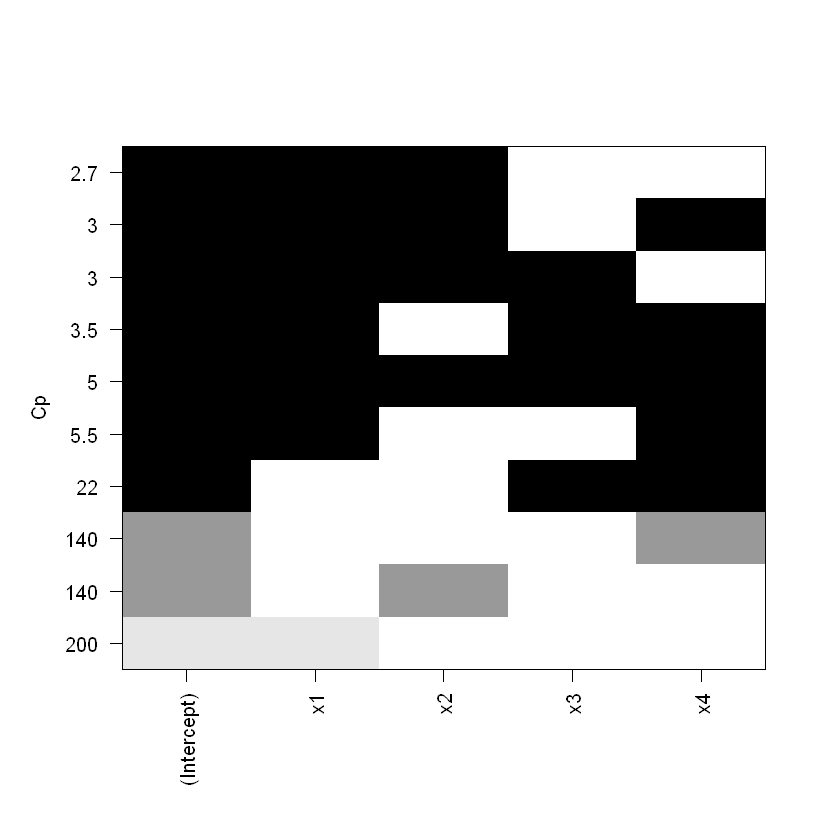

In [14]:
 plot(all.submodels, scale="Cp")

# plot statistic by subset size 

# subsets(all.submodels, statistic="cp")

In [15]:
 R2adj <- summary(all.submodels)$adjr2
 Cp <- summary(all.submodels)$cp
 BIC <- summary(all.submodels)$bic

 
 data.frame(summary(all.submodels)$which, R2adj=R2adj, Cp=Cp, BIC=BIC)

 
 forward <- regsubsets(Y ~ x1+x2+x3+x4, data=cemento,  method="forward")
 summary(forward)
 
 
 backward <- regsubsets(Y ~ x1+x2+x3+x4, data=cemento,  method="backward")
 summary(backward)

,X.Intercept.,x1,x2,x3,x4,R2adj,Cp,BIC
,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
X1,TRUE,FALSE,FALSE,FALSE,TRUE,0.6449549,138.730833,-9.462884
X1.1,TRUE,FALSE,TRUE,FALSE,FALSE,0.6359290,142.486407,-9.136532
X1.2,TRUE,TRUE,FALSE,FALSE,FALSE,0.4915797,202.548769,-4.795057
X2,TRUE,TRUE,TRUE,FALSE,FALSE,0.9744140,2.678242,-42.329587
X2.1,TRUE,TRUE,FALSE,FALSE,TRUE,0.9669653,5.495851,-39.007873
X2.2,TRUE,FALSE,FALSE,TRUE,TRUE,0.9223476,22.373112,-27.896994
X3,TRUE,TRUE,TRUE,FALSE,TRUE,0.9764473,3.018233,-42.210745
X3.1,TRUE,TRUE,TRUE,TRUE,FALSE,0.9763796,3.041280,-42.173433
X3.2,TRUE,TRUE,FALSE,TRUE,TRUE,0.9750415,3.496824,-41.457078


Subset selection object
Call: regsubsets.formula(Y ~ x1 + x2 + x3 + x4, data = cemento, method = "forward")
4 Variables  (and intercept)
   Forced in Forced out
x1     FALSE      FALSE
x2     FALSE      FALSE
x3     FALSE      FALSE
x4     FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: forward
         x1  x2  x3  x4 
1  ( 1 ) " " " " " " "*"
2  ( 1 ) "*" " " " " "*"
3  ( 1 ) "*" "*" " " "*"
4  ( 1 ) "*" "*" "*" "*"

Subset selection object
Call: regsubsets.formula(Y ~ x1 + x2 + x3 + x4, data = cemento, method = "backward")
4 Variables  (and intercept)
   Forced in Forced out
x1     FALSE      FALSE
x2     FALSE      FALSE
x3     FALSE      FALSE
x4     FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: backward
         x1  x2  x3  x4 
1  ( 1 ) " " "*" " " " "
2  ( 1 ) "*" "*" " " " "
3  ( 1 ) "*" "*" " " "*"
4  ( 1 ) "*" "*" "*" "*"